In [15]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from skimage.feature import hog
import seaborn as sns

In [2]:
paths = glob.glob('training_set/**/*')
print(paths[:10])

['training_set\\cats\\cat.1.jpg', 'training_set\\cats\\cat.10.jpg', 'training_set\\cats\\cat.100.jpg', 'training_set\\cats\\cat.1000.jpg', 'training_set\\cats\\cat.1001.jpg', 'training_set\\cats\\cat.1002.jpg', 'training_set\\cats\\cat.1003.jpg', 'training_set\\cats\\cat.1004.jpg', 'training_set\\cats\\cat.1005.jpg', 'training_set\\cats\\cat.1006.jpg']


In [3]:
def load_image(paths, image_size):
    list_images = []
    list_labels = []
    for path in paths:
        try:
            # obtener la etiqueta de la imagen
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            # pasar las imagenes a un tamaño fijo
            img = cv2.resize(img, image_size)
            # Aplica la transformada de Hough para detectar líneas
            fd, hog_imagen = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)
            #Flatten y dividir entre 255 
            # vector = img.flatten()/255.0
            list_images.append(fd)
            
            #1 perro 
            if 'dogs' in path:
                list_labels.append(1)
            else: 
                #Gatos
                list_labels.append(0)
        except:
            pass
    return list_images, list_labels

In [4]:
image_size = (64, 64)
list_images, list_labels = load_image(paths, image_size)

In [5]:
X = list_images
y = list_labels

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\zrvic\Developer\bit_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [8]:
X_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, X_pred_train)
print('accuracy_score:', accuracy_train)

accuracy_score: 0.7988757026858213


confusion_matrix: [[2481  700]
 [ 588 2635]]


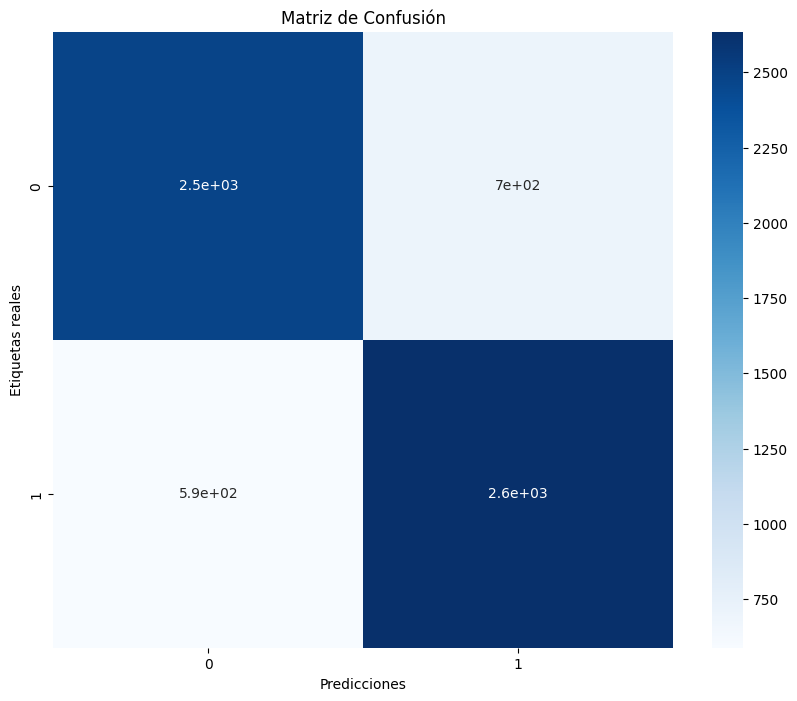

In [9]:
confusion_matrix_train = confusion_matrix(y_train, X_pred_train)
print('confusion_matrix:', confusion_matrix_train)
# Crea una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))

# Grafica la matriz de confusión utilizando seaborn
sns.heatmap(confusion_matrix_train, annot=True, cmap="Blues", ax=ax)

# Agrega título y etiquetas a los ejes
ax.set_title("Matriz de Confusión")
ax.set_xlabel("Predicciones")
ax.set_ylabel("Etiquetas reales")

# Muestra la gráfica
plt.show()

In [10]:
y_pred_test = model.predict(X_test)
accuracy = accuracy_score(y_pred_test, y_test)
print('accuracy score', accuracy)

accuracy score 0.707682698313554


In [11]:
y_pred_test = model.predict(X_test)
recall = recall_score(y_pred_test, y_test)
print('recall:', recall)

recall: 0.6919315403422983


In [12]:
paths = glob.glob('test_set/**/*')
list_images, list_labels = load_image(paths, image_size)
print(len(paths))

2025


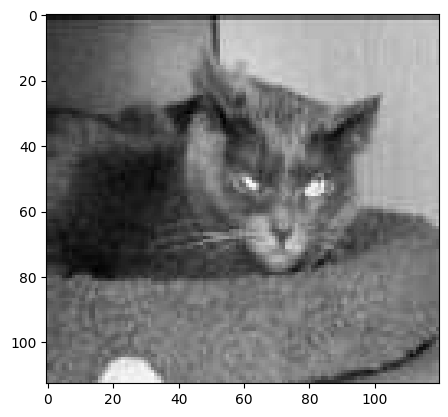

Predicción: 0


In [13]:
n = 366
randon_image = list_images[n]
y_pred = model.predict(randon_image.reshape(1, -1))

img = cv2.imread(paths[n], cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

print('Predicción:', y_pred[0])

In [ ]:
# buscar los mejores parametros para el modelo logistic regression
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'lbfgs', 'saga']
# }
# grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
# grid.fit(X_train, y_train)
# print('Mejor parametro:', grid.best_params_)
# print('Mejor score:', grid.best_score_)
# print('Mejor estimador:', grid.best_estimator_)


c:\Users\zrvic\Developer\bit_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zrvic\Developer\bit_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zrvic\Developer\bit_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zrvic\Developer\bit_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zrvic\Developer\bit_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zrvic\Developer\bit_env\Lib\site-packages\sklearn\linear_mode

KeyboardInterrupt: 